# Contenu

Une demande de prêt est utilisée par les emprunteurs pour demander un prêt. Grâce à la demande de prêt, les emprunteurs révèlent au prêteur des détails clés sur leurs finances. La demande de prêt est cruciale pour déterminer si le prêteur accordera la demande de fonds ou de crédit.


# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data Train & Test


In [2]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv",index_col=False)
loan_data = loan_data.drop(['Unnamed: 0'], axis=1)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [4]:
loan_data.shape


(491, 13)

Nous avons 491 lignes et 13 colonnes dans train dataset.

In [5]:
test_data.shape


(123, 12)

Nous avons 123 lignes et 12 colonnes dans l'ensemble de données de test.

In [6]:
loan_data['Loan_Status'].value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [7]:
loan_data['Loan_Status'].value_counts(normalize=True)

1    0.698574
0    0.301426
Name: Loan_Status, dtype: float64

<AxesSubplot:>

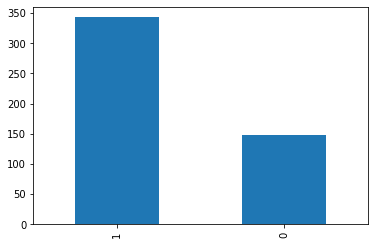

In [8]:
loan_data['Loan_Status'].value_counts().plot.bar()

Le prêt de 343 (environ 69,85 %) personnes sur 491 a été approuvé.

Maintenant, visualisons chaque variable séparément. Les différents types de variables sont catégoriques, ordinales et numériques.

* Fonctionnalités catégorielles : ces fonctionnalités ont des catégories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* Caractéristiques ordinales : variables dans les caractéristiques catégorielles ayant un certain ordre impliqué (Dependents, Education, Property_Area)
* Caractéristiques numériques : ces caractéristiques ont des valeurs numériques (ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term)

## Independent Variable (Categorical)

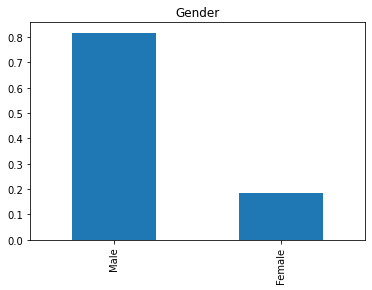

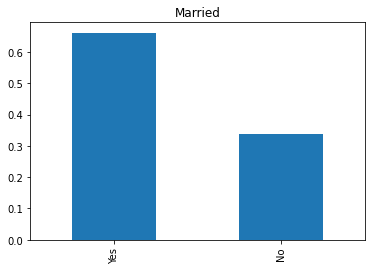

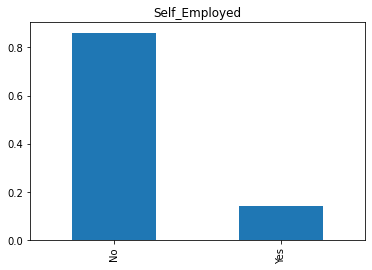

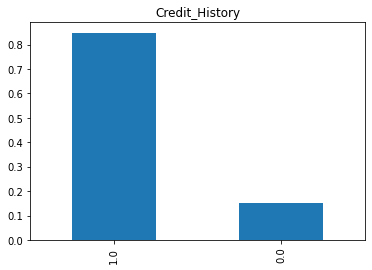

In [9]:
loan_data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
loan_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
loan_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
loan_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()


On peut déduire des diagrammes à barres ci-dessus que :

* 80 % des candidats dans l'ensemble de données sont des hommes.
* Environ 65% des candidats de l'ensemble de données sont mariés.
* Environ 15 % des candidats de l'ensemble de données sont des travailleurs indépendants.
* Environ 85% des candidats ont remboursé leurs detes.

## Independent Variable (Ordinal)

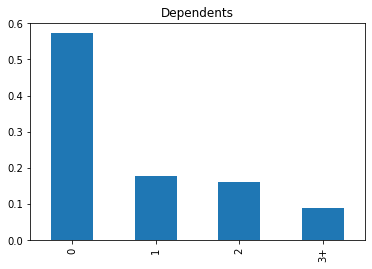

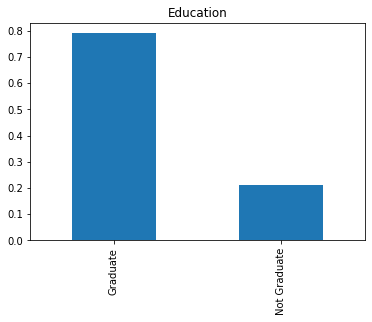

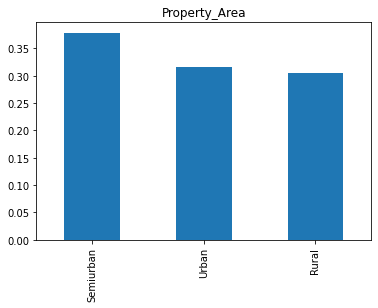

In [10]:
loan_data['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents')
plt.show()
loan_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
loan_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Les déductions suivantes peuvent être faites à partir des diagrammes à barres ci-dessus :

* La plupart des candidats n'ont pas de personnes à charge.
* Environ 80% des candidats sont diplômés.
* La plupart des candidats sont de la zone semi-urbaine.

## Independent Variable (Numerical)

Jusqu'à présent, nous avons vu les variables catégorielles et ordinales et maintenant on va visualiser les variables numériques. Regardons d'abord la répartition des revenus du demandeur.

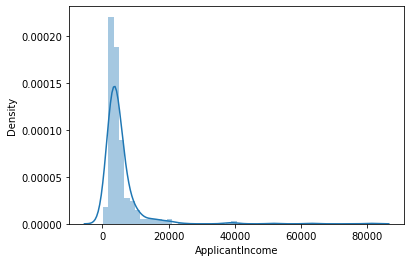

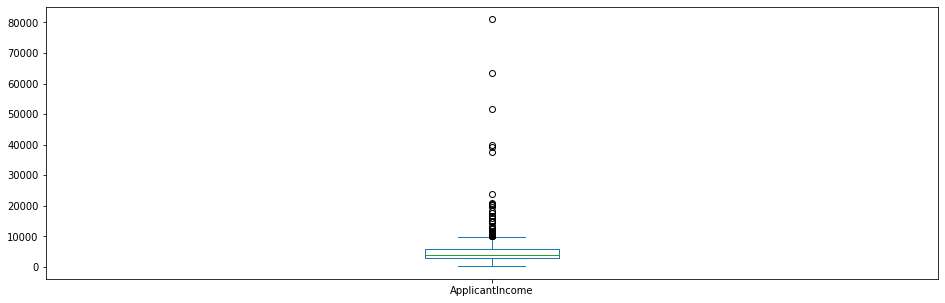

In [11]:
sns.distplot(loan_data['ApplicantIncome'])
plt.show()
loan_data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

On peut en déduire que la plupart des données de la répartition des revenus des demandeurs sont orientées vers la gauche, ce qui signifie qu'elles ne sont pas normalement réparties. Nous essaierons de le rendre normal dans les sections suivantes, car les algorithmes fonctionnent mieux si les données sont distribuées normalement.

Le boxplot confirme la présence de beaucoup de valeurs aberrantes/extrêmes. Cela peut être attribué à la disparité des revenus dans la société. Cela peut être dû en partie au fait que nous examinons des personnes ayant des niveaux d'éducation différents. Séparons-les par éducation.

Text(0.5, 0.98, '')

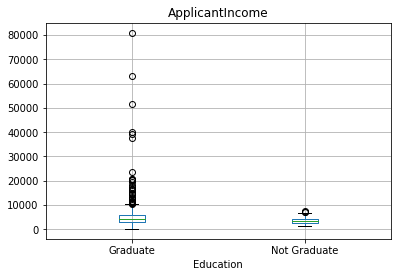

In [12]:
loan_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

On constate qu'il y a un plus grand nombre de diplômés aux revenus très élevés, qui apparaissent comme des valeurs aberrantes.

Regardons la répartition des revenus du codemandeur.

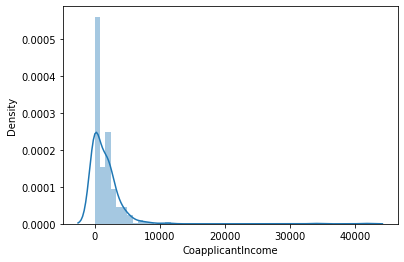

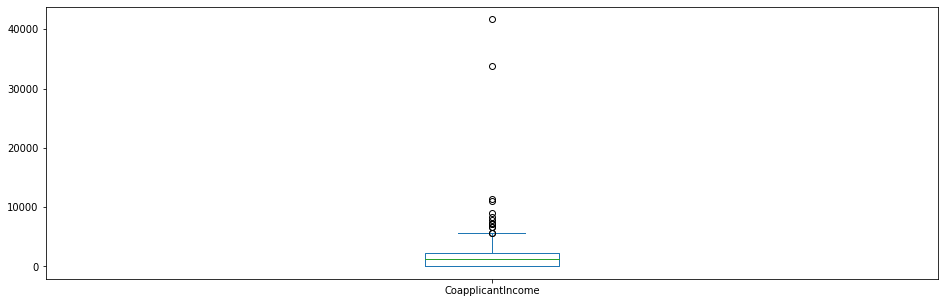

In [13]:
sns.distplot(loan_data['CoapplicantIncome'])
plt.show()
loan_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()


Nous constatons une répartition similaire à celle des revenus du demandeur. La majorité des revenus des codemandeurs vont de 0 à 5 000. Nous voyons également beaucoup de valeurs aberrantes dans les revenus des candidats et ils ne sont pas normalement distribués.

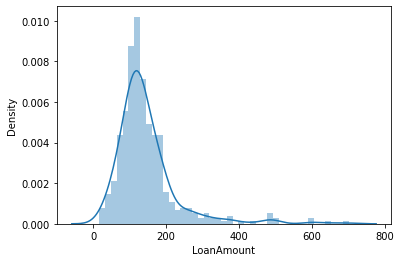

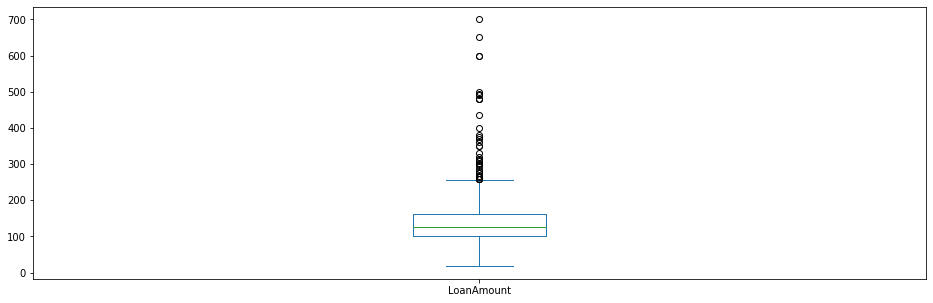

In [14]:
loan_data.notna()
# train.dropna()
# print(train[train['LoanAmount'].isnull()])
# train['LoanAmount'] = pd.to_numeric(train['LoanAmount'], errors='coerce')
# train = train.dropna(subset=['LoanAmount'])
# train['LoanAmount'] = train['LoanAmount'].astype(int)
sns.distplot(loan_data['LoanAmount'])
plt.show()
loan_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Nous voyons beaucoup de valeurs aberrantes dans cette variable et la distribution est assez normale. Nous traiterons les valeurs aberrantes dans les sections suivantes.

## Bivariate Analysis
Rappelons quelques-unes des hypothèses que nous avons générées précédemment :

* Les candidats à revenu élevé devraient avoir plus de chances d'obtenir une approbation de prêt.
* Les candidats qui ont remboursé leurs dettes antérieures devraient avoir plus de chances d'obtenir une approbation de prêt.
* L'approbation du prêt doit également dépendre du montant du prêt. Si le montant du prêt est inférieur, les chances d'approbation du prêt devraient être élevées.
* Moins le montant à payer mensuellement pour rembourser le prêt est élevé, plus les chances d'approbation du prêt sont élevées.
Essayons de tester les hypothèses mentionnées ci-dessus en utilisant l'analyse bivariée

Après avoir examiné chaque variable individuellement en analyse univariée, nous allons maintenant les explorer à nouveau par rapport à la variable cible.

### Categorical Independent Variable vs Target Variable

Tout d'abord, nous allons trouver la relation entre la variable cible et les variables indépendantes catégorielles. Examinons maintenant le graphique à barres empilées qui nous donnera la proportion de prêts approuvés et non approuvés.

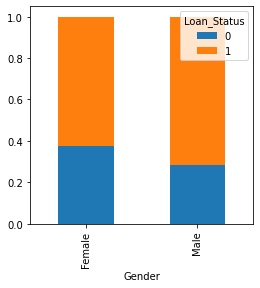

In [15]:
Gender=pd.crosstab(loan_data['Gender'],loan_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

On peut en déduire que la proportion d'hommes et de femmes candidats est plus ou moins la même pour les prêts approuvés et non approuvés.

Visualisons maintenant les variables catégorielles restantes par rapport à la variable cible.

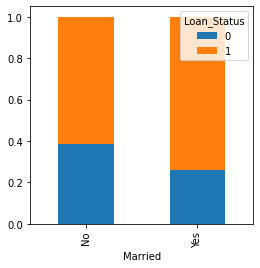

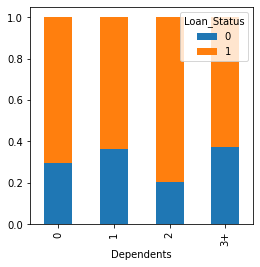

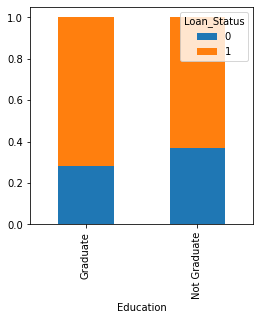

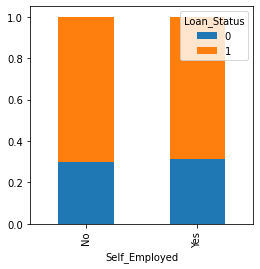

In [16]:
Married=pd.crosstab(loan_data['Married'],loan_data['Loan_Status'])
Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status'])
Education=pd.crosstab(loan_data['Education'],loan_data['Loan_Status'])
Self_Employed=pd.crosstab(loan_data['Self_Employed'],loan_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

* La proportion de candidats mariés est plus élevée pour les prêts approuvés.
* La répartition des candidats avec 1 ou 3 personnes à charge est similaire dans les deux catégories de Loan_Status.
* Il n'y a rien de significatif que nous puissions déduire du graphique Self_Employed vs Loan_Status.


Nous allons maintenant examiner la relation entre les variables indépendantes catégorielles restantes et Loan_Status.

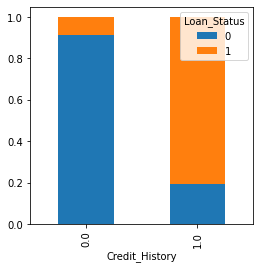

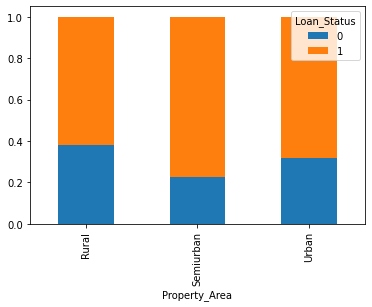

In [17]:
Credit_History=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
Property_Area=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

* Il semble que les personnes ayant des antécédents de crédit comme 1 soient plus susceptibles d'obtenir l'approbation de leurs prêts.*
* La proportion de prêts approuvés dans la zone semi-urbaine est plus élevée que dans les zones rurales ou urbaines.

Visualisons maintenant les variables numériques indépendantes par rapport à la variable cible.

### Numerical Independent Variable vs Target Variable

Nous allons essayer de trouver le revenu moyen des personnes pour lesquelles le prêt a été approuvé vs le revenu moyen des personnes pour lesquelles le prêt n'a pas été approuvé.

<AxesSubplot:xlabel='Loan_Status'>

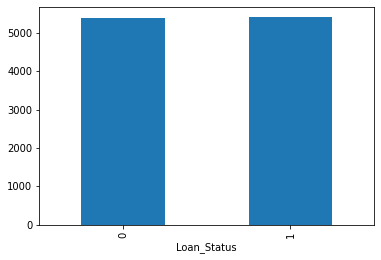

In [18]:
loan_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Ici, l'axe des y représente le revenu moyen du demandeur. Nous ne voyons aucun changement dans le revenu moyen. Créons donc des cases pour la variable de revenu du demandeur en fonction des valeurs qu'elle contient et analysons le statut de prêt correspondant pour chaque case.

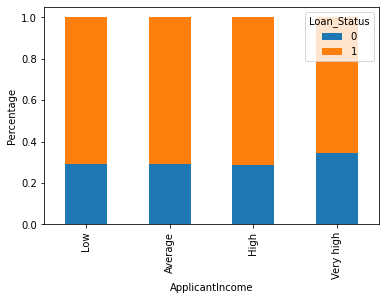

In [19]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Income_bin']=pd.cut(loan_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_data['Income_bin'],loan_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

On peut en déduire que le revenu du demandeur n'affecte pas les chances d'approbation du prêt, ce qui contredit notre hypothèse dans laquelle nous supposons que si le revenu du demandeur est élevé, les chances d'approbation du prêt le seront également.

Nous analyserons le revenu du codemandeur et la variable du montant du prêt de la même manière.

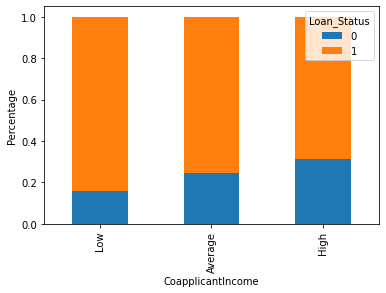

In [20]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_data['Coapplicant_Income_bin']=pd.cut(loan_data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(loan_data['Coapplicant_Income_bin'],loan_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

Il montre que si le revenu des codemandeurs est moindre, les chances d'approbation du prêt sont élevées. Mais cela ne semble pas correct. La raison possible derrière cela peut être que la plupart des demandeurs n'ont pas de codemandeur, donc le revenu du codemandeur pour ces demandeurs est de 0 et donc l'approbation du prêt n'en dépend pas. Ainsi, nous pouvons créer une nouvelle variable dans laquelle nous combinerons les revenus du demandeur et des codemandeurs pour visualiser l'effet combiné des revenus sur l'approbation du prêt.

Combinons le revenu du demandeur et le revenu du codemandeur et voyons l'effet combiné du revenu total sur le Loan_Status.

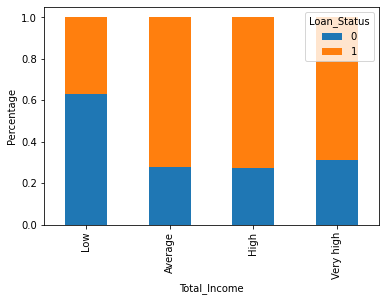

In [21]:
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Total_Income_bin']=pd.cut(loan_data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(loan_data['Total_Income_bin'],loan_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

Nous pouvons voir que la proportion de prêts approuvés pour les candidats ayant un faible revenu total est très inférieure à celle des candidats ayant un revenu moyen, élevé et très élevé.

Visualisons la variable Montant du prêt.

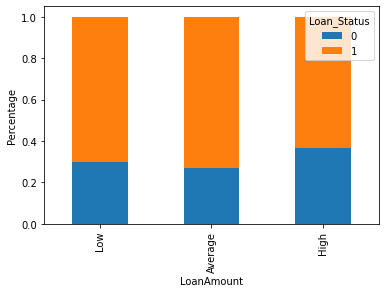

In [22]:
bins=[0,100,200,700]
group=['Low','Average','High']
loan_data['LoanAmount_bin']=pd.cut(loan_data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(loan_data['LoanAmount_bin'],loan_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

On peut voir que la proportion de prêts approuvés est plus élevée pour le montant du prêt faible et moyen par rapport à celle du montant du prêt élevé, ce qui soutient notre hypothèse dans laquelle nous avons considéré que les chances d'approbation du prêt seront élevées lorsque le montant du prêt est inférieur.

Laissons tomber les bacs que nous avons créés pour la partie exploration. Nous allons changer la variable 3+ dans les dépendances en 3 pour en faire une variable numérique. Nous allons également convertir les catégories de la variable cible en 0 et 1 afin que nous puissions trouver sa corrélation avec les variables numériques. Une autre raison de le faire est que peu de modèles comme la régression logistique n'utilisent que des valeurs numériques en entrée. Nous remplacerons N par 0 et Y par 1.

In [23]:
# print(train.dtypes)
loan_data=loan_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
loan_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)


Regardons maintenant la corrélation entre toutes les variables numériques. Nous utiliserons la carte thermique pour visualiser la corrélation. Les cartes thermiques visualisent les données à travers des variations de coloration. Les variables de couleur plus foncée signifient que leur corrélation est plus élevée.

<AxesSubplot:>

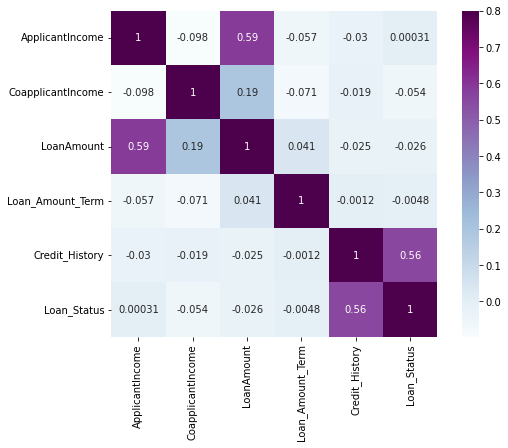

In [24]:
matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)


Nous voyons que les variables les plus corrélées sont (ApplicantIncome - LoanAmount) et (Credit_History - Loan_Status).

(LoanAmount est également corrélé avec CoapplicantIncome).

## Missing value imputation

Listons le nombre de valeurs manquantes en fonction des fonctionnalités.

In [25]:
loan_data.isnull().sum()

Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

Il manque des valeurs dans les fonctionnalités Sexe, Marié, Personnes à charge, Travailleur indépendant, Montant du prêt, Montant_du_prêt_Terme et Historique_crédit.

Nous traiterons les valeurs manquantes dans toutes les fonctionnalités une par une.

On peut considérer ces méthodes pour remplir les valeurs manquantes :

   * Pour les variables numériques : imputation par moyenne ou médiane
   * Pour les variables catégorielles : imputation par mode
  
Il y a très moins de valeurs manquantes dans les fonctionnalités Sexe, Marié, Personnes à charge, Historique de crédit et Travailleur indépendant, nous pouvons donc les remplir en utilisant le mode des fonctionnalités.

In [26]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

Essayons maintenant de trouver un moyen de remplir les valeurs manquantes dans Loan_Amount_Term. Nous examinerons le nombre de valeurs de la variable Durée du montant du prêt

In [27]:
loan_data['Loan_Amount_Term'].value_counts()


360.0    404
180.0     35
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

On peut voir que dans la variable de durée du montant du prêt, la valeur de 360 se répète le plus. Nous allons donc remplacer les valeurs manquantes dans cette variable en utilisant le mode de cette variable.

In [28]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

Nous allons maintenant voir la variable LoanAmount. Comme il s'agit d'une variable numérique, nous pouvons utiliser la moyenne ou la médiane pour imputer les valeurs manquantes. Nous utiliserons la médiane pour remplir les valeurs nulles car nous avons vu précédemment que le montant du prêt a des valeurs aberrantes, donc la moyenne ne sera pas la bonne approche car elle est fortement affectée par la présence de valeurs aberrantes.

In [29]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

Vérifions maintenant si toutes les valeurs manquantes sont renseignées dans l'ensemble de données.

In [30]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Comme nous pouvons le voir, toutes les valeurs manquantes ont été renseignées dans l'ensemble de données de test. Remplissons également toutes les valeurs manquantes dans l'ensemble de données de test avec la même approche.

In [31]:
test_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

## Outlier Treatement

Comme nous l'avons vu précédemment dans l'analyse univariée, LoanAmount contient des valeurs aberrantes, nous devons donc les traiter car la présence de valeurs aberrantes affecte la distribution des données.

Examinons ce qui peut arriver à un ensemble de données avec __outliers__.

Pour l'exemple de jeu de données :

__1,1,2,2,2,2,3,3,3,4,4__

Nous trouvons les éléments suivants : moyenne, médiane, mode et écart type

* Moyenne = 2,58
* Médiane = 2,5
* Mode=2
* Écart type = 1,08

Si nous ajoutons une valeur aberrante à l'ensemble de données :

__1,1,2,2,2,2,3,3,3,4,4,400__

Les nouvelles valeurs de nos statistiques sont :

* Moyenne = 35,38
* Médiane = 2,5
* Mode=2
* Écart type = 114,74

On peut voir que le fait d'avoir des valeurs aberrantes a souvent un effet significatif sur la moyenne et l'écart type et affecte donc la distribution.

Nous devons prendre des mesures pour supprimer les valeurs aberrantes de nos ensembles de données.

En raison de ces valeurs aberrantes, la majeure partie des données du montant du prêt se trouve à gauche et la queue à droite est plus longue.

C'est ce qu'on appelle __droite asymétrie__. Une façon de supprimer le __skewness__ consiste à effectuer la transformation __log.__

Lorsque nous prenons la transformation __log__, cela n'affecte pas beaucoup les valeurs les plus petites, mais réduit les valeurs les plus élevées. Ainsi, nous obtenons une __distribution__ similaire à la __distribution normale__.

Visualisons l'effet de __log transformation__. Nous apporterons les mêmes modifications au fichier de test simultanément.

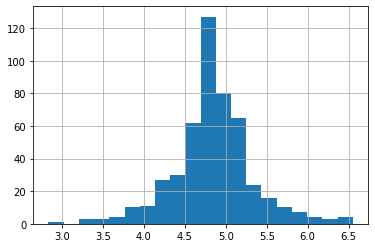

In [32]:
loan_data['LoanAmount_log']=np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])

Maintenant, la distribution semble beaucoup plus proche de la normale et l'effet des valeurs extrêmes s'est considérablement atténué.

Construisons un modèle de régression logistique et faisons des prédictions pour l'ensemble de données de test.

# Model Building : 

## __Partie I__

Faisons notre premier modèle pour prédire la variable cible. Nous commencerons par la régression logistique qui est utilisée pour prédire le résultat binaire.

* La régression logistique est un algorithme de classification. Il est utilisé pour prédire un résultat binaire (1/0, Oui/Non, Vrai/Faux) étant donné un ensemble de variables indépendantes.
* La régression logistique est une estimation de la fonction Logit. La fonction Logit est simplement un journal des cotes en faveur de l'événement.
Cette fonction crée une courbe en forme de S avec l'estimation de la probabilité, qui est très similaire à la fonction pas à pas requise

Pour en savoir plus sur la régression logistique, reportez-vous à cet article : https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/
Laissons tomber la variable Loan_ID car elle n'a aucun effet sur le statut du prêt. Nous apporterons les mêmes modifications à l'ensemble de données de test que nous avons apportées à l'ensemble de données d'entraînement.

In [33]:
loan_data=loan_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

Nous utiliserons scikit-learn (sklearn) pour créer différents modèles, qui est une bibliothèque open source pour Python. C'est l'un des outils les plus efficaces qui contient de nombreuses fonctions intégrées pouvant être utilisées pour la modélisation en Python.

Pour en savoir plus sur sklearn, référez-vous ici : http://scikit-learn.org/stable/tutorial/index.html

Sklearn requiert la variable cible dans un ensemble de données distinct. Nous allons donc supprimer notre variable cible de l'ensemble de données entrainé et l'enregistrer dans un autre ensemble de données.

In [34]:
X = loan_data.drop('Loan_Status',axis=1)
y = loan_data.Loan_Status

Nous allons maintenant créer des variables muettes pour les variables catégorielles. La variable fictive transforme les variables catégorielles en une série de 0 et 1, ce qui les rend beaucoup plus faciles à quantifier et à comparer. Comprenons d'abord le processus des mannequins :

* Considérez la variable « Sexe ». Il a deux classes, « Homme et Femme ».
* Comme la régression logistique ne prend en entrée que les valeurs numériques, nous devons changer le masculin et le féminin en valeur numérique.
* Une fois que nous avons appliqué des variables factices à cette variable, la variable "Sexe" sera convertie en deux variables (Gender_Male et Gender_Female), une pour chaque classe, c'est-à-dire Homme et Femme.
* Gender_Male aura une valeur de 0 si le genre est Femme et une valeur de 1 si le genre est Homme.

In [35]:
train = loan_data.copy()
test = test_data.copy()

In [36]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Nous allons maintenant entraîner le modèle sur l'ensemble de données d'entraînement et faire des prédictions pour l'ensemble de données de test. Mais peut-on valider ces prédictions ? Une façon de le faire est de diviser notre ensemble de données d'entraînement en deux parties : l'entraînement et la validation. Nous pouvons entraîner le modèle sur cette partie de train et l'utiliser pour faire des prédictions pour la partie de validation. De cette façon, nous pouvons valider nos prédictions car nous avons les vraies prédictions pour la partie validation (que nous n'avons pas pour l'ensemble de données de test).

Nous utiliserons la fonction train_test_split de sklearn pour diviser notre ensemble de données de train. Alors, commençons par importer train_test_split.

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3)

L'ensemble de données a été divisé en partie d'entraînement et de validation. Importons LogisticRegression et precision_score depuis sklearn et ajustons le modèle de régression logistique.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
model = LogisticRegression()
model.fit(x_train, y_train)
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12',random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression()

Prédisons l'ensemble Loan_Status pour la validation et calculons sa précision.

In [39]:
pred_cv = model.predict(x_valid)
print('Model Accuracy = ', accuracy_score(y_valid,pred_cv))
print('Model F1-Score = ', f1_score(y_valid,pred_cv))

Model Accuracy =  0.7837837837837838
Model F1-Score =  0.8545454545454546


Nos prévisions sont donc exactes à près de 80 %, c'est-à-dire que nous avons identifié correctement 80 % de l'état du prêt.

Faisons des prédictions pour l'ensemble de données de test.

In [40]:
pred_test = model.predict(test)

## __Prediction Test data & téléchargement pour vérifier la solution__

In [ ]:
res = pd.DataFrame(pred_test) 
res.index = test_data.index 
res.columns = ["prediction"]

# pour télécharger le fichier csv localement
from google.colab import files
res.to_csv('datathon_loan_lr.csv', index=False)         
files.download('datathon_loan_lr.csv')

Nous avons un score :  __#9	85.39325842696628__

## Logistic Regression using stratified k-folds cross validation

Pour vérifier la robustesse de notre modèle aux données invisibles, nous pouvons utiliser la validation. C'est une technique qui consiste à réserver un échantillon particulier d'un jeu de données sur lequel vous n'entraînez pas le modèle. Plus tard, vous testez votre modèle sur cet échantillon avant de le finaliser. Certaines des méthodes courantes de validation sont énumérées ci-dessous :

* L'approche des ensembles de validation
* validation croisée k-fold
* Omettre une validation croisée (LOOCV)
* Validation croisée stratifiée k-fold


Si vous souhaitez en savoir plus sur les techniques de validation, veuillez vous référer à cet article : https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

Dans cette section, nous allons en apprendre davantage sur la validation croisée stratifiée k-fold. Laissez-nous comprendre comment cela fonctionne:

* La stratification est le processus de réorganisation des données afin de s'assurer que chaque pli est un bon représentant de l'ensemble.
* Par exemple, dans un problème de classification binaire où chaque classe comprend 50% des données, il est préférable d'organiser les données de telle sorte que dans chaque pli, chaque classe comprend environ la moitié des instances.
* C'est généralement une meilleure approche pour traiter à la fois le biais et la variance.
* Un pli sélectionné au hasard peut ne pas représenter adéquatement la classe mineure, en particulier dans les cas où il y a un énorme déséquilibre de classe.


Importons StratifiedKFold depuis sklearn et adaptons le modèle.

In [ ]:
from sklearn.model_selection import StratifiedKFold

Créons maintenant un modèle logistique de validation croisée avec 5 plis stratifiés et faisons des prédictions pour l'ensemble de données de test

In [ ]:
i=1
mean = 0
fmean = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    f1score = f1_score(yvl,pred_test)
    mean += score
    fmean += f1score
    print('#######################')
    print ('accuracy_score',score)
    print('-------------------------')
    print ('F1 Score ',f1score)
    print('#######################')
    i+=1
    pred_test_f = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print('----------- Final Mean Score---------------')    
print('###########################################')
print ('\n Mean Validation Accuracy',mean/(i-1))
print ('\n Mean Validation F1 Score',fmean/(i-1))
print('###########################################')
print('-------------------------------------------')    



1 of kfold 5 
#######################
accuracy_score 0.8181818181818182
-------------------------
F1 Score  0.881578947368421
#######################

2 of kfold 5 
#######################
accuracy_score 0.7551020408163265
-------------------------
F1 Score  0.8356164383561644
#######################

3 of kfold 5 
#######################
accuracy_score 0.7551020408163265
-------------------------
F1 Score  0.8500000000000001
#######################

4 of kfold 5 
#######################
accuracy_score 0.8367346938775511
-------------------------
F1 Score  0.8840579710144928
#######################

5 of kfold 5 
#######################
accuracy_score 0.7959183673469388
-------------------------
F1 Score  0.8684210526315789
#######################
----------- Final Mean Score---------------
###########################################

 Mean Validation Accuracy 0.7922077922077921

 Mean Validation F1 Score 0.8639348818741315
###########################################
-----------------

* La précision de validation moyenne pour ce modèle s'avère être de __0,7922__ .

* Le score moyen de validation f1 pour ce modèle s'avère être __0.8639__ .

Visualisons la courbe roc.

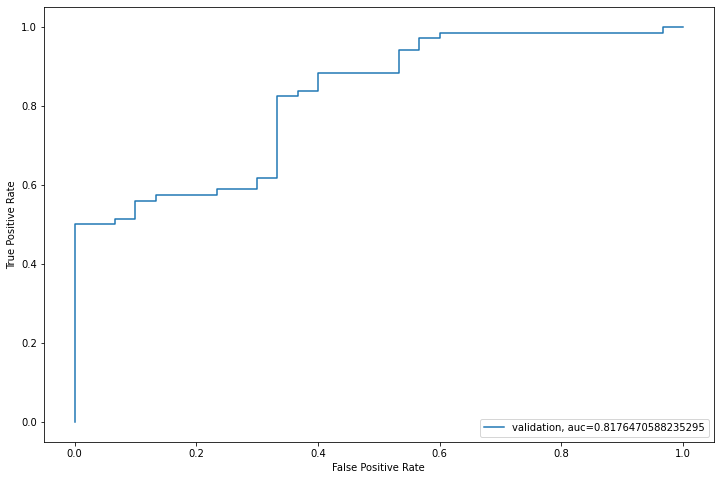

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

* Nous avons une valeur "auc" de __0.8176__

In [ ]:
res = pd.DataFrame(pred_test_f) # Les prédictions ne sont rien d'autre que les prédictions finales de votre modèle sur les caractéristiques d'entrée de vos nouvelles données de test invisibles
res.index = test_data.index # c'est important pour la comparaison. Ici, "test_new" est votre nouvel ensemble de données de test
res.columns = ["prediction"]

# Pour télécharger le fichier csv localement
from google.colab import files
res.to_csv('datathon_loan_lr_crosval.csv', index=False)         
files.download('datathon_loan_lr_crosval.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nous avons obtenu un score : __84.91620111731845__

## Feature Engineering

Sur la base de la connaissance du domaine, nous pouvons proposer de nouvelles fonctionnalités qui pourraient affecter la variable cible. Nous allons créer les trois nouvelles fonctionnalités suivantes :

* __Revenu total__ - Comme discuté lors de l'analyse bivariée, nous combinerons le revenu du demandeur et le revenu du codemandeur. Si le revenu total est élevé, les chances d'approbation du prêt peuvent également être élevées.
* __EMI__ - EMI est le montant mensuel à payer par le demandeur pour rembourser le prêt. L'idée derrière la création de cette variable est que les personnes qui ont des IME élevés pourraient avoir des difficultés à rembourser le prêt. Nous pouvons calculer l'IME en prenant le ratio du montant du prêt par rapport à la durée du montant du prêt.
* __Revenu du solde__ - Il s'agit du revenu restant après le paiement de l'IME. L'idée derrière la création de cette variable est que si cette valeur est élevée, les chances sont élevées qu'une personne rembourse le prêt et augmente ainsi les chances d'approbation du prêt.

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

Vérifions la distribution du revenu total.

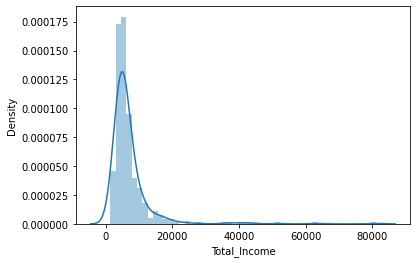

In [ ]:
sns.distplot(train['Total_Income'])

Nous pouvons voir qu'elle est décalée vers la gauche, c'est-à-dire que la distribution est asymétrique à droite. Prenons donc la transformation du journal pour rendre la distribution normale.

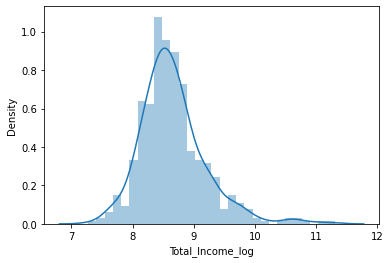

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Maintenant, la distribution semble beaucoup plus proche de la normale et l'effet des valeurs extrêmes a été considérablement atténué. Créons maintenant la fonction EMI.

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

Vérifions la distribution de la variable EMI.

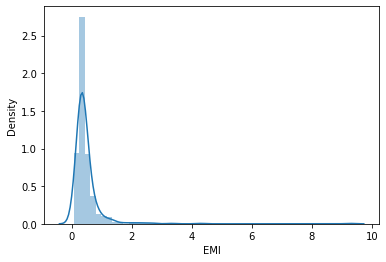

In [ ]:
sns.distplot(train['EMI'])

Créons maintenant la fonction Balance Income et vérifions sa distribution.

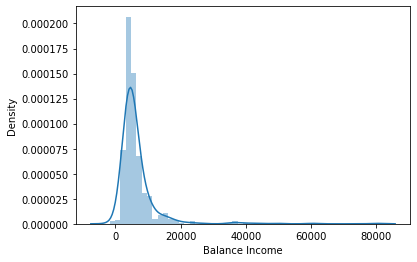

In [ ]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

Laissons maintenant tomber les variables que nous avons utilisées pour créer ces nouvelles fonctionnalités.

  La raison en est que la corrélation entre ces anciennes caractéristiques et ces nouvelles caractéristiques sera très élevée et la régression logistique suppose que les variables ne sont pas fortement corrélées.

Nous voulons également supprimer le bruit de l'ensemble de données, donc la suppression des fonctionnalités corrélées aidera également à réduire le bruit.

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

## __Partie II__

Après avoir créé de nouvelles fonctionnalités, nous pouvons continuer le processus de création de modèles.

Nous allons donc commencer par un modèle de régression logistique, puis passer à des modèles plus complexes comme RandomForest et XGBoost.

Nous allons construire les modèles suivants dans cette section.

* Régression logistique
* Decision Tree
* Random Forest (0,79)
* XGBoost (0,72)

Préparons les données pour alimenter les modèles.

In [ ]:
X = train.drop('Loan_Status', axis= 1)
y = train.Loan_Status

### __Logistic Regression__

In [ ]:
i=1
mean = 0
fmean = 0
print('----------- After Features Engineering---------------')    
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    f1score = f1_score(yvl,pred_test)
    mean += score
    fmean += f1score
    print('#######################')
    print ('accuracy_score',score)
    print('-------------------------')
    print ('F1 Score ',f1score)
    print('#######################')
    i+=1
    pred_test_fe = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


print('----------- Final Mean Score---------------')    
print('###########################################')
print ('\n Mean Validation Accuracy',mean/(i-1))
print ('\n Mean Validation F1 Score',fmean/(i-1))
print('###########################################')
print('-------------------------------------------')    


----------- After Features Engineering---------------

1 of kfold 5 
#######################
accuracy_score 0.797979797979798
-------------------------
F1 Score  0.8648648648648648
#######################

2 of kfold 5 
#######################
accuracy_score 0.7040816326530612
-------------------------
F1 Score  0.802721088435374
#######################

3 of kfold 5 
#######################
accuracy_score 0.7653061224489796
-------------------------
F1 Score  0.849673202614379
#######################

4 of kfold 5 
#######################
accuracy_score 0.826530612244898
-------------------------
F1 Score  0.881118881118881
#######################

5 of kfold 5 
#######################
accuracy_score 0.7959183673469388
-------------------------
F1 Score  0.8684210526315789
#######################
----------- Final Mean Score---------------
###########################################

 Mean Validation Accuracy 0.7779633065347351

 Mean Validation F1 Score 0.8533598179330155
###########

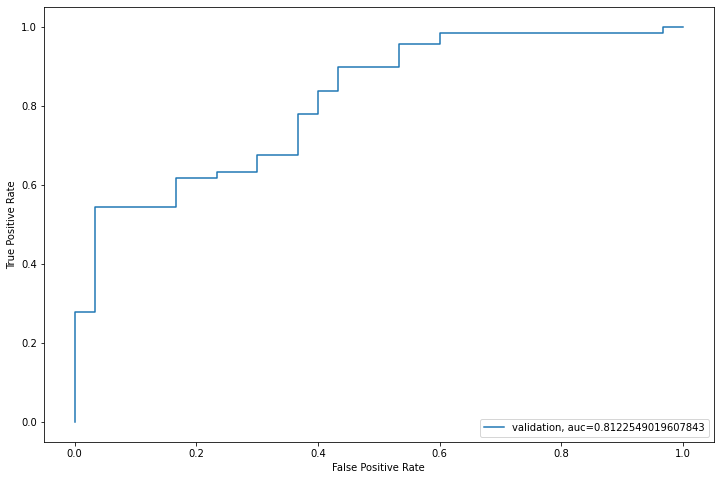

In [ ]:
# Faut pas le dire ça !!!!

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# ca non plus le dit pas

#  # Pour créer Dataframe de valeur prédite avec un indice respectif particulier
res = pd.DataFrame(pred_test_fe) 
res.index = test_data.index 
res.columns = ["prediction"]

from google.colab import files
res.to_csv('datathon_loan_lr_fe.csv', index=False)         
files.download('datathon_loan_lr_fe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Le Solveur a obtenu un score __#5  86.1878453038674__

Jour : __23/12/2021 à 19:03__

On reprend ici

### __Decision Tree__

L'arbre de décision est un type d'algorithme d'apprentissage supervisé (ayant une variable cible prédéfinie) qui est principalement utilisé dans les problèmes de classification. Dans cette technique, nous divisons la population ou l'échantillon en deux ou plusieurs ensembles homogènes (ou sous-populations) en fonction du diviseur / différentiateur le plus significatif dans les variables d'entrée.

Les arbres de décision utilisent plusieurs algorithmes pour décider de diviser un nœud en deux ou plusieurs sous-nœuds. La création de sous-nœuds augmente l'homogénéité des sous-nœuds résultants. En d'autres termes, on peut dire que la pureté du nœud augmente par rapport à la variable cible.

Pour une explication détaillée, visitez https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#six

Ajustons le modèle d'arbre de décision avec 5 fold de validation croisée.

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
i=1
mean = 0
fmean = 0
print('----------- After Features Engineering---------------')    
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model_tree = DecisionTreeClassifier(random_state=1)
    model_tree.fit(xtr,ytr)
    pred_test=model_tree.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    f1score = f1_score(yvl,pred_test)
    mean += score
    fmean += f1score
    print('#######################')
    print ('accuracy_score',score)
    print('-------------------------')
    print ('F1 Score ',f1score)
    print('#######################')
    i+=1
    pred_test_tree = model_tree.predict(test)
    pred = model_tree.predict_proba(xvl)[:,1]


print('----------- Final Mean Score---------------')    
print('###########################################')
print ('\n Mean Validation Accuracy',mean/(i-1))
print ('\n Mean Validation F1 Score',fmean/(i-1))
print('###########################################')
print('-------------------------------------------')    

----------- After Features Engineering---------------

1 of kfold 5 
#######################
accuracy_score 0.7575757575757576
-------------------------
F1 Score  0.8356164383561644
#######################

2 of kfold 5 
#######################
accuracy_score 0.673469387755102
-------------------------
F1 Score  0.7681159420289855
#######################

3 of kfold 5 
#######################
accuracy_score 0.673469387755102
-------------------------
F1 Score  0.7894736842105263
#######################

4 of kfold 5 
#######################
accuracy_score 0.7346938775510204
-------------------------
F1 Score  0.7999999999999999
#######################

5 of kfold 5 
#######################
accuracy_score 0.7448979591836735
-------------------------
F1 Score  0.8201438848920864
#######################
----------- Final Mean Score---------------
###########################################

 Mean Validation Accuracy 0.7168212739641311

 Mean Validation F1 Score 0.8026699898975526
########

In [ ]:
res = pd.DataFrame(pred_test_tree) 
res.index = test_data.index 
res.columns = ["prediction"]

from google.colab import files
res.to_csv('datathon_loan_tree_fe.csv', index=False)         
files.download('datathon_loan_tree_fe.csv')